In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score

## Data Loading and preview

In [2]:
churn = pd.read_csv("customer-churn.csv")
churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preview the data

In [3]:
churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## format columns and categorica;s

In [4]:
churn.columns = churn.columns.str.lower().str.replace(" ", "_")

categorical_columns = churn.dtypes[churn.dtypes == "O"].index

for c in categorical_columns:
    churn[c] = churn[c].str.lower().str.replace(" ", "_")

churn.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## clean total charges

In [5]:
churn.totalcharges = pd.to_numeric(churn.totalcharges, errors="coerce")
churn["totalcharges"] = churn.totalcharges.fillna(0)
churn.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

## change the target variable to numeric

In [6]:
churn.churn = churn.churn.apply(lambda churn: churn == "yes" ).astype(int)
churn.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [7]:
df_full_train, df_test =  train_test_split(churn, test_size=0.2, random_state=1)
df_full_train.shape, df_test.shape

((5634, 21), (1409, 21))

In [8]:
df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train.shape, df_val.shape

((4225, 21), (1409, 21))

In [9]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()
df_val = df_val.reset_index()

In [10]:
y_train = df_train.churn
y_val = df_val.churn
y_test = df_test.churn

In [11]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

## EDA

In [12]:
df_full_train = df_full_train.reset_index()
df_full_train.isnull().sum()

index               0
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [13]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [14]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [15]:


numerical = ["tenure", "monthlycharges", "totalcharges"]

# list(set(df_full_train.columns) - set(numerical))

categorical = ['onlinesecurity', 'deviceprotection', 'gender', 'partner', 'paymentmethod', 'paperlessbilling', 'seniorcitizen', 'techsupport', 'phoneservice', 'dependents', 'onlinebackup', 'contract', 'multiplelines', 'streamingmovies', 'internetservice', 'streamingtv']

df_full_train[categorical].nunique()

onlinesecurity      3
deviceprotection    3
gender              2
partner             2
paymentmethod       4
paperlessbilling    2
seniorcitizen       2
techsupport         3
phoneservice        2
dependents          2
onlinebackup        3
contract            3
multiplelines       3
streamingmovies     3
internetservice     3
streamingtv         3
dtype: int64

## Churn rate in Different Group - feature importance 

In [16]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [17]:
gender_churn_rate = df_full_train.groupby("gender")["churn"].mean()

gender_churn_rate

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [18]:
partner_churn_rate = df_full_train.groupby("partner")["churn"].mean()
partner_churn_rate

partner
no     0.329809
yes    0.205033
Name: churn, dtype: float64

## Risk Ratio - feature importance 

divide group churn rate by global > 1, more likely to churn and < 1, less likely to churn

In [19]:
gender_churn_rate / global_churn_rate

gender
female    1.025396
male      0.974980
Name: churn, dtype: float64

In [20]:
partner_churn_rate / global_churn_rate

partner
no     1.221659
yes    0.759472
Name: churn, dtype: float64

## combined feature importance risk ratio and diff 

In [21]:
from IPython.display import display
for col in categorical:
    print(col)
    print("*" * 20)
    df_group = df_full_train.groupby(col).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_churn_rate
    df_group["risk"] = df_group["mean"] / global_churn_rate
    display(df_group)
    print("*" * 20)

onlinesecurity
********************


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


********************
deviceprotection
********************


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


********************
gender
********************


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


********************
partner
********************


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


********************
paymentmethod
********************


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


********************
paperlessbilling
********************


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


********************
seniorcitizen
********************


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


********************
techsupport
********************


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


********************
phoneservice
********************


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


********************
dependents
********************


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


********************
onlinebackup
********************


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


********************
contract
********************


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


********************
multiplelines
********************


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


********************
streamingmovies
********************


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


********************
internetservice
********************


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


********************
streamingtv
********************


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


********************


## Mutual Information 

tells us how much we learn about a variable from another variable

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
def mutual_info(series):
    return mutual_info_score(series, df_full_train.churn)

In [24]:
mi = df_full_train[categorical].apply(mutual_info)

mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance correlation 

In [25]:
df_full_train[numerical].corrwith(df_full_train["churn"]).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## One Hot Encoding 

In [26]:
from sklearn.feature_extraction import DictVectorizer

In [27]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [28]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
# dv.fit(val_dicts)
X_val = dv.transform(val_dicts)
X_val.shape

(1409, 45)

## Building the LogisticReg Model 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression(solver="liblinear", max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [31]:
model.intercept_[0]

-0.12193598860157635

In [32]:
model.coef_[0]

array([ 6.06519786e-01, -5.77017179e-02, -6.70754057e-01, -2.78895685e-02,
       -9.40464201e-02,  5.21200917e-02, -1.02683471e-01, -7.13726089e-02,
       -4.20012044e-02, -7.99347842e-02, -3.75799425e-01,  3.56546908e-01,
       -1.02683471e-01,  2.35999552e-03, -2.47635994e-01,  1.33439700e-01,
       -7.73969413e-03,  5.66162599e-02, -1.02683471e-01, -7.58687771e-02,
        2.16934639e-01, -1.02683471e-01, -2.36187156e-01, -2.49228989e-01,
        1.27293000e-01, -1.15843371e-01, -6.09261788e-03, -1.00597077e-01,
       -4.85036005e-02,  6.74370095e-02, -4.02723207e-02,  1.33439700e-01,
       -2.55375689e-01,  1.98888454e-01, -1.01010877e-01, -1.02683471e-01,
        8.17583601e-02, -6.44902537e-02, -1.02683471e-01,  4.52377366e-02,
        1.70074756e-01, -1.02683471e-01, -1.89327273e-01, -6.68705478e-02,
        3.76388638e-04])

In [33]:
# model.predict(X_train) # hard prediction
# model.predict_proba(X_train) # soft prediction probability of churning 

In [34]:
y_pred = model.predict_proba(X_val)[:, 1] # probability of churning 
y_pred

array([0.00735889, 0.20971757, 0.22070437, ..., 0.14887918, 0.78483979,
       0.8105809 ])

In [35]:
churn_pred = y_pred > 0.5

len(churn_pred)

1409

In [36]:
len(y_val.values)

1409

In [37]:
(y_val == churn_pred).mean()

0.8055358410220014

## build full model

In [38]:
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(full_train_dicts)



model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_full_train, df_full_train.churn)

LogisticRegression(max_iter=1000, solver='liblinear')

In [39]:
test_dicts = df_test[categorical + numerical].to_dict(orient="records")
X_test = dv.transform(test_dicts)

y_pred = model.predict_proba(X_test)[:, 1]

churn_pred = y_pred > 0.5

accuracy = (y_test == churn_pred).mean()

round(accuracy, 2)

0.81

## Try different threshold and plot them to visualize the best

0.54 0.82


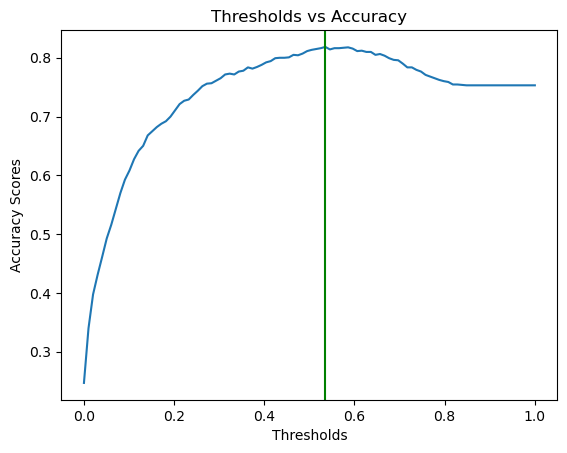

In [40]:
thresholds = np.linspace(0, 1, 100)
scores = []
for threshold in thresholds:
    
    score = accuracy_score(y_test, y_pred > threshold)
    scores.append(score)

best_threshold = thresholds[scores.index(max(scores))]

print(round(best_threshold,2), round(max(scores),2))

plt.plot(thresholds, scores)
plt.axvline(x=best_threshold,ymin=0,ymax=1, c="g")
plt.xlabel("Thresholds")
plt.ylabel("Accuracy Scores")
plt.title("Thresholds vs Accuracy")
plt.show()

## confusion table - gives more explanation than accuracy

In [41]:
actual_positive = (y_test == 1)
actual_negative =  (y_test == 0)

In [42]:
predicted_positive = (y_pred >= best_threshold)
predicted_negative =  (y_pred < best_threshold)

In [43]:
tp =  sum(actual_positive & predicted_positive)
tn =  sum(actual_negative & predicted_negative)

tp, tn

(191, 962)

In [44]:
fp = sum(actual_negative & predicted_positive)
fn = sum(actual_positive & predicted_negative)

fp, fn

(99, 157)

In [45]:
confusion_matrix = np.array([[tn, fp],[fn, tp]])

confusion_matrix

array([[962,  99],
       [157, 191]])

In [46]:
normalized_confusion_matrix = (confusion_matrix / confusion_matrix.sum())
np.round(normalized_confusion_matrix,2)*100

array([[68.,  7.],
       [11., 14.]])

## precision and recall

In [47]:
precision = tp / (fp + tp)
round(precision,2)

#34% are mistakes - they get promotion, but not really needed to keep them 

0.66

In [48]:
recall = tp / (fn + tp)
round(recall,2)

# we fail to identify 45% who are churning
# accuracy can be misleading

0.55

## Roc curve

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

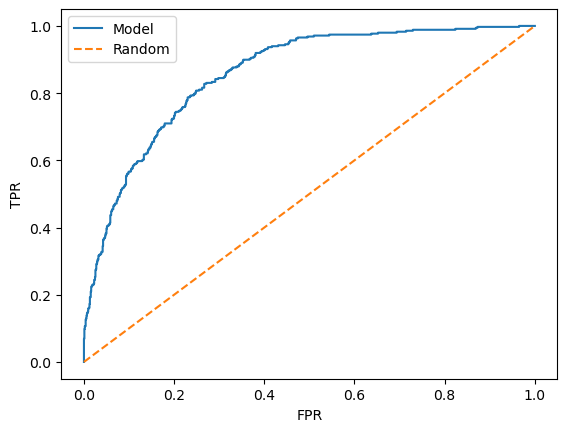

In [50]:
plt.plot(fpr, tpr, label="Model")
plt.plot([0,1], [0,1], label="Random", linestyle='dashed')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

## AUC = probability of the score of a randomly selected positive example is greater than the score of a negatively selected example

In [51]:
roc_auc_score(y_test, y_pred)

0.8579400803839363

## Cross Validation

In [55]:
def train_model(df_train, y_train, c=0.001):
    train_dicts = df_train[categorical + numerical].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(max_iter=1000, C=c, solver="liblinear")
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    df_dicts = df[categorical + numerical].to_dict(orient="records")

    X = dv.fit_transform(df_dicts)

    y_pred = model.predict_proba(X)[:,1]

    return y_pred



In [53]:
from sklearn.model_selection import KFold

In [70]:
for c in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]:
    
    scores = []
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        
        dv, model = train_model(df_train, df_train.churn, c=c)
        
        y_pred = predict(df_val, dv, model)

        score = roc_auc_score(df_val.churn, y_pred)
        
        scores.append(score)

    scores_mean = np.mean(scores)
    scores_std = np.std(scores)
    
    print(f"{c}: {scores_mean:.6f}, +/-{scores_std:.3f}")

0.001: 0.825713, +/-0.016
0.01: 0.840441, +/-0.012
0.1: 0.841732, +/-0.012
0.5: 0.842004, +/-0.012
1: 0.842091, +/-0.012
5: 0.841973, +/-0.012
10: 0.842029, +/-0.012
100: 0.842247, +/-0.012


## train final model

In [78]:
dv, model = train_model(df_full_train, df_full_train.churn, c=100)

In [79]:
y_pred = predict(df_test, dv, model)

In [81]:
roc_auc_score(y_test, y_pred)

0.8579725806276881